In [26]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#import statannotations
from statannot import add_stat_annotation


In [27]:
# Open datasets

data_20 = pd.read_csv('../data/img_scout_dfs/2020/smr_vis_skysat_scout_2020.csv')
data_21 = pd.read_csv('../data/img_scout_dfs/2021/smr_vis_skysat_scout_2021.csv')
data_22 = pd.read_csv('../data/img_scout_dfs/2022/smr_vis_skysat_scout_2022.csv')

dfs = [data_20, data_21, data_22]

In [3]:
# # Add VIs
# def add_vis(df):
#     df['ndvi']= (df['nir']-df['red'])/(df['nir']+df['red'])
#     df['evi']= 2.5*(df['nir']-df['red'])/(df['nir']+6*df['red']-7.5*df['blue']+1)
#     df['savi']= 1.5*(df['nir']-df['red'])/(df['nir']+df['red']+0.5)
#     #df['sr']= df['nir']/df['red']
#     #df['msr']= ((df['nir']/df['red'])-1)/(np.sqrt((df['nir']/df['red'])+1))
#     #df['dvi']= df['nir']-df['red']
#     #df['nirv']= df['ndvi']*df['nir']
#     df['gcc']=df['green']/(df['green']+df['red']+df['blue'])
#     #df['tvi']=0.5*(120*(df['nir']-df['green'])-200*(df['red']-df['green']))
#     df['arvi']=(df['nir']-(2*df['red']-df['blue']))/(df['nir']+(2*df['red']-df['blue']))
#     df['gri']=df['green']/df['red']
    
#     return df

In [2]:
# for df in dfs:
#     add_vis(df)

<AxesSubplot: xlabel='veg_smr', ylabel='Count'>

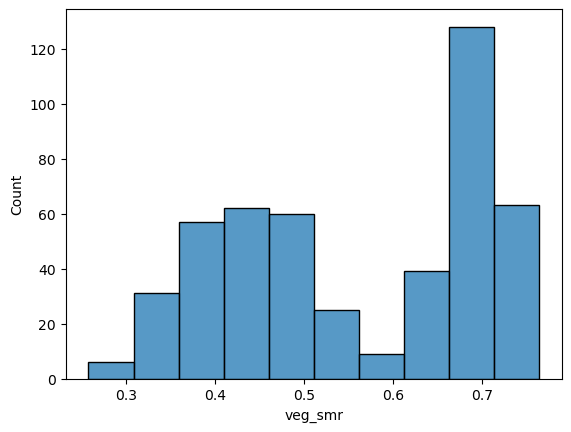

In [11]:
# Check veg_smr distribution

#sns.histplot(data=data_20, x='veg_smr')
#sns.histplot(data=data_21, x='veg_smr')
#sns.histplot(data=data_22, x='veg_smr')

In [28]:
print('2020 SMR min:', data_20.veg_smr.min())
print('2020 SMR max:', data_20.veg_smr.max())

print('2021 SMR min:', data_21.veg_smr.min())
print('2021 SMR max:', data_21.veg_smr.max())

print('2022 SMR min:', data_22.veg_smr.min())
print('2022 SMR max:', data_22.veg_smr.max())

2020 SMR min: 0.3919692993164062
2020 SMR max: 0.9133546105746564
2021 SMR min: 0.3977887630462646
2021 SMR max: 0.7413048426310221
2022 SMR min: 0.2580500920613607
2022 SMR max: 0.7640066475703798


In [29]:
def group_by_smr(df):
    df['smr_group'] = ''
    
    df.loc[df['veg_smr']<=0.5,'smr_group']= '<= 0.50'
    df.loc[(df['veg_smr']> 0.5)&(df['veg_smr']<=0.6),'smr_group']='0.51-0.60'
    df.loc[(df['veg_smr']> 0.6)&(df['veg_smr']<=0.7),'smr_group']='0.61-0.70'
    df.loc[(df['veg_smr']> 0.7)&(df['veg_smr']<=0.8),'smr_group']='0.71-0.80'
    df.loc[(df['veg_smr']> 0.8)&(df['veg_smr']<=0.92),'smr_group']='0.81-0.92'


In [30]:
def group_by_intensity(df, intensity_col, thresh, class_col):
    '''
    Groups data into high and low severity classes
    according to a threshold.
    
    df: (pandas dataframe) dataframe with disease intensity data
    
    intensity_col: (str) name of column containing intensity data to group by
    
    thresh: (int) disease intensity threshold. Samples with disease intensity > thresh are labeled 'high
    Samples with disease intensity <= thresh are labeled as 'low'.
    
    class_col: (str) name for class column
    '''
    
    df[class_col] = 'low'
    df.loc[df[intensity_col] > thresh, class_col]= 'high'
    

In [31]:
for df in dfs:
    group_by_smr(df)
    group_by_intensity(df,'DM_severity', 10, 'severity_class')
    group_by_intensity(df,'DM_inc', 25, 'inc_class')

data_20

,acquired,plot,blue,green,red,nir,veg_smr,ndvi,evi,arvi,...,PM_severity,DM_severity,total_dis,geometry,centroid,PM_inc,DM_inc,smr_group,severity_class,inc_class
0,20200618,1,0.040044,0.077491,0.071216,0.353575,0.625638,0.664645,0.476852,0.550969,...,0.0,0.00,0.00,POLYGON ((-77.0152645742787 42.878300949250196...,POINT (-77.0153084903025 42.8783140936145),0.0,0.0,0.61-0.70,low,low
1,20200618,2,0.044693,0.081807,0.077133,0.336587,0.561786,0.627084,0.443112,0.508888,...,0.0,0.05,5.05,POLYGON ((-77.01535545427274 42.87831851925121...,POINT (-77.0153965503027 42.87833067861654),0.0,5.0,0.51-0.60,low,low
2,20200618,4,0.040121,0.076396,0.070693,0.343482,0.605042,0.658447,0.465074,0.544600,...,0.0,0.00,0.50,POLYGON ((-77.01552730426143 42.87835065925314...,POINT (-77.01557007030289 42.87836309362055),0.0,0.0,0.61-0.70,low,low
3,20200618,5,0.034862,0.073497,0.060772,0.358279,0.672617,0.709667,0.508858,0.610102,...,0.0,0.00,15.10,POLYGON ((-77.01561588425558 42.87836680925413...,POINT (-77.01565649030296 42.878378758622546),0.0,0.0,0.61-0.70,low,low
4,20200618,6,0.039300,0.075070,0.068893,0.337817,0.598983,0.661213,0.461689,0.548580,...,0.0,0.00,5.65,"POLYGON ((-77.01570014425 42.878381989255075, ...",POINT (-77.01574402030295 42.87839504362453),0.0,0.0,0.51-0.60,low,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,20200812,154,0.033227,0.056373,0.036703,0.367113,0.775700,0.818722,0.617055,0.803339,...,0.0,0.60,0.60,POLYGON ((-77.01605999902254 42.87867018016665...,POINT (-77.0161013453033 42.878682743632794),0.0,10.0,0.71-0.80,low,low
495,20200812,155,0.029468,0.054482,0.033250,0.364829,0.785763,0.832787,0.617028,0.815558,...,0.0,0.25,0.25,"POLYGON ((-77.0161457490169 42.8786865901676, ...",POINT (-77.01618532530341 42.878698738634725),0.0,5.0,0.71-0.80,low,low
496,20200812,157,0.028348,0.053731,0.030669,0.392379,0.856217,0.854825,0.663148,0.844657,...,0.0,0.20,0.20,"POLYGON ((-77.0163147390058 42.87871901016951,...",POINT (-77.01635581030357 42.87873143863867),0.0,10.0,0.81-0.92,low,low
497,20200812,158,0.031935,0.059768,0.037213,0.380077,0.800813,0.821521,0.628525,0.798687,...,0.0,3.45,3.45,"POLYGON ((-77.0163999390002 42.87873515017044,...",POINT (-77.01644346530357 42.878748438640656),0.0,30.0,0.81-0.92,low,high


In [26]:
data_20['severity_class'] = 'low'

data_20.loc[data_20['DM_severity']>10,'severity_class']= 'high'

In [32]:
smr_ranges = data_20['smr_group'].unique()
smr_ranges

array(['0.61-0.70', '0.51-0.60', '<= 0.50', '0.71-0.80', '0.81-0.92'],
      dtype=object)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.71-0.80_low v.s. 0.71-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.454e-02 U_stat=1.188e+03
0.61-0.70_low v.s. 0.61-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.813e-03 U_stat=1.700e+01
0.81-0.92_low v.s. 0.81-0.92_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.371e-01 U_stat=1.660e+02


Text(0.5, 1.0, 'EVI 2020, All Rows')

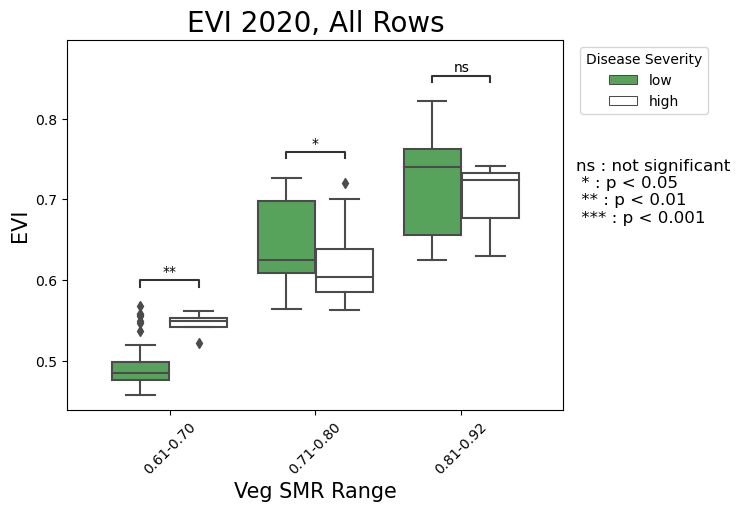

In [33]:
x = "smr_group"
y = "evi"
hue = "severity_class"
hue_order=['low', 'high']
order = ['0.61-0.70', '0.71-0.80', '0.81-0.92']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low"))]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_20, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.61-0.70', '0.71-0.80', '0.81-0.92'], 
                   rotation=45)
add_stat_annotation(ax, data=data_20, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Veg SMR Range", fontsize=15)
plt.ylabel("EVI", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("EVI 2020, All Rows", fontsize=20)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.71-0.80_low v.s. 0.71-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.096e-01 U_stat=1.085e+03
0.61-0.70_low v.s. 0.61-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.521e-03 U_stat=2.100e+01
0.81-0.92_low v.s. 0.81-0.92_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.062e-02 U_stat=2.230e+02


Text(0.5, 1.0, 'ARVI 2020, All Rows')

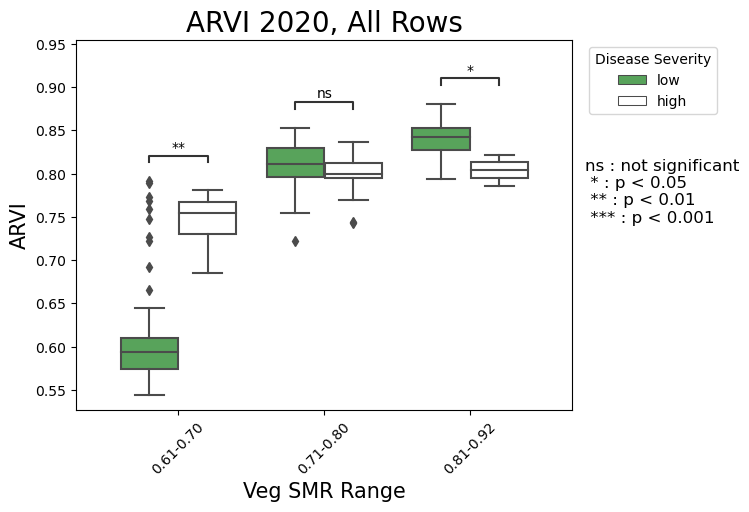

In [38]:
x = "smr_group"
y = "arvi"
hue = "severity_class"
hue_order=['low', 'high']
order = ['0.61-0.70', '0.71-0.80', '0.81-0.92']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low"))
    ]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_20, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.61-0.70', '0.71-0.80', '0.81-0.92'], 
                   rotation=45)
add_stat_annotation(ax, data=data_20, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Veg SMR Range", fontsize=15)
plt.ylabel("ARVI", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("ARVI 2020, All Rows", fontsize=20)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.71-0.80_low v.s. 0.71-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.284e-02 U_stat=1.191e+03
0.61-0.70_low v.s. 0.61-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.724e-03 U_stat=2.300e+01
0.81-0.92_low v.s. 0.81-0.92_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.092e-01 U_stat=1.850e+02


Text(0.5, 1.0, 'SAVI 2020, All Rows')

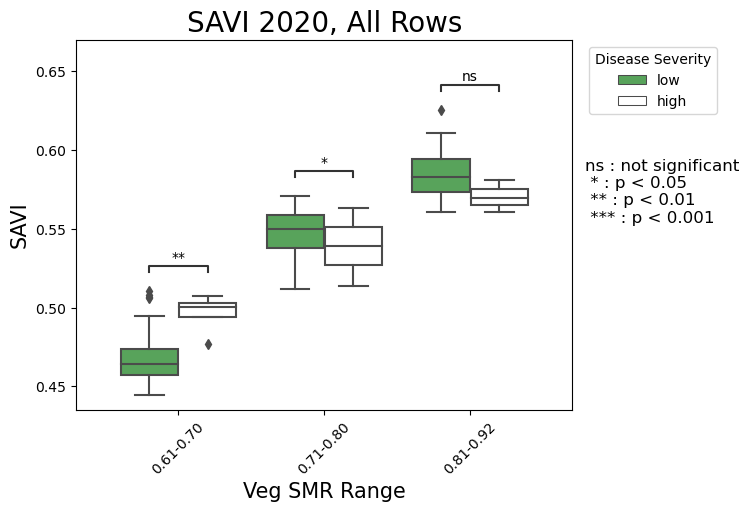

In [52]:
x = "smr_group"
y = "savi"
hue = "severity_class"
hue_order=['low', 'high']
order = ['0.61-0.70', '0.71-0.80', '0.81-0.92']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low"))
    ]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_20, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.61-0.70', '0.71-0.80', '0.81-0.92'], 
                   rotation=45)
add_stat_annotation(ax, data=data_20, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Veg SMR Range", fontsize=15)
plt.ylabel("SAVI", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("SAVI 2020, All Rows", fontsize=20)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.71-0.80_low v.s. 0.71-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.697e-02 U_stat=1.151e+03
0.61-0.70_low v.s. 0.61-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.125e-01 U_stat=6.800e+01
0.81-0.92_low v.s. 0.81-0.92_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.540e+02


Text(0.5, 1.0, 'MSAVI 2020, All Rows')

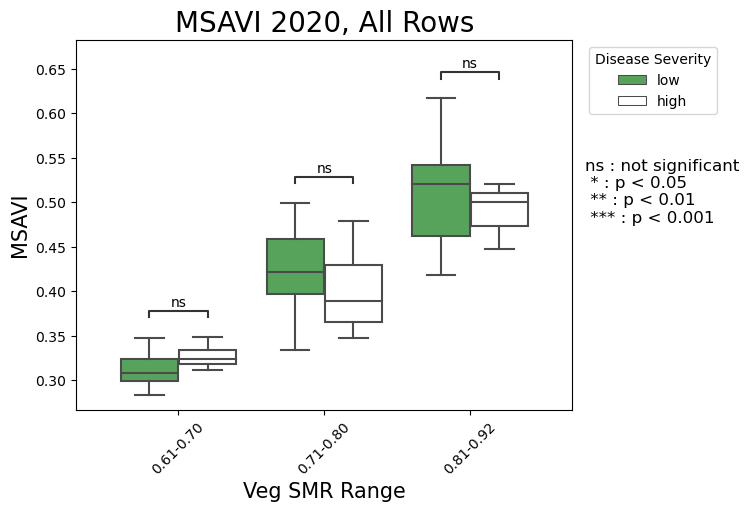

In [53]:
x = "smr_group"
y = "msavi"
hue = "severity_class"
hue_order=['low', 'high']
order = ['0.61-0.70', '0.71-0.80', '0.81-0.92']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low"))
    ]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_20, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.61-0.70', '0.71-0.80', '0.81-0.92'], 
                   rotation=45)
add_stat_annotation(ax, data=data_20, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Veg SMR Range", fontsize=15)
plt.ylabel("MSAVI", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("MSAVI 2020, All Rows", fontsize=20)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.71-0.80_low v.s. 0.71-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.697e-02 U_stat=1.151e+03
0.61-0.70_low v.s. 0.61-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.125e-01 U_stat=6.800e+01
0.81-0.92_low v.s. 0.81-0.92_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.540e+02


Text(0.5, 1.0, 'MSAVI 2020, All Rows')

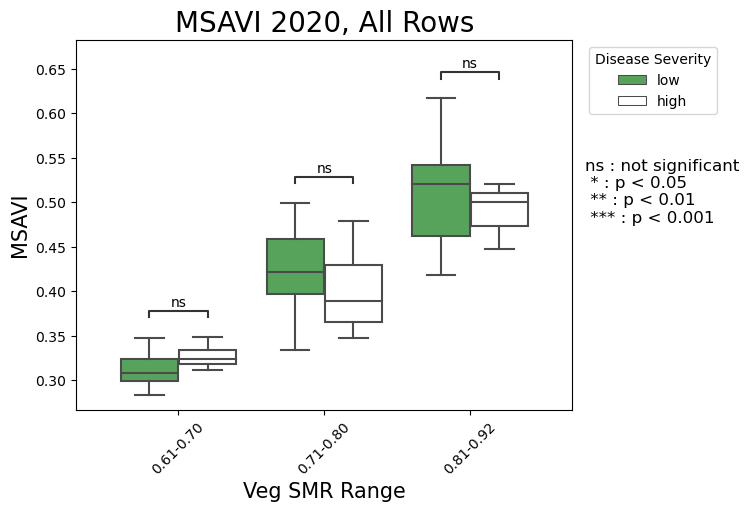

In [41]:
x = "smr_group"
y = "msavi"
hue = "severity_class"
hue_order=['low', 'high']
order = ['0.61-0.70', '0.71-0.80', '0.81-0.92']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low"))
    ]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_20, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.61-0.70', '0.71-0.80', '0.81-0.92'], 
                   rotation=45)
add_stat_annotation(ax, data=data_20, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Veg SMR Range", fontsize=15)
plt.ylabel("MSAVI", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("MSAVI 2020, All Rows", fontsize=20)


In [42]:
dm_only = data_20.loc[data_20['Block']=='DM']
dm_only.Block.unique()

array(['DM'], dtype=object)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.71-0.80_low v.s. 0.71-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.250e-01 U_stat=7.000e+01


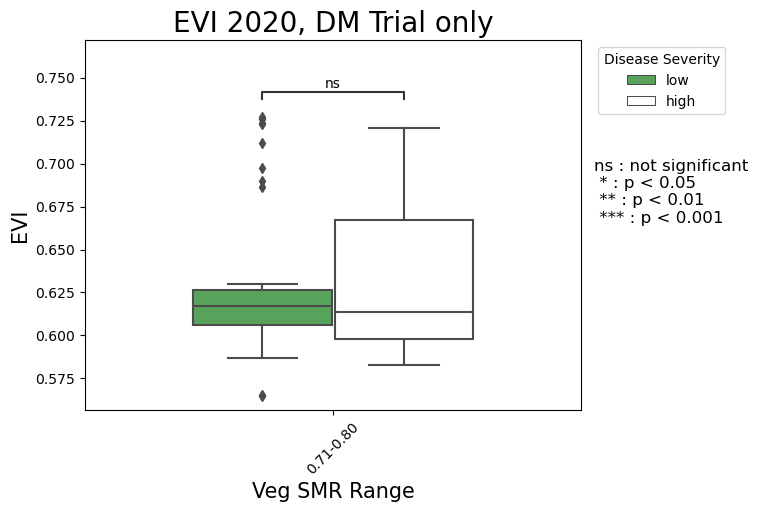

In [54]:
x = "smr_group"
y = "evi"
hue = "severity_class"
hue_order=['low', 'high']
order = ['0.71-0.80']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=dm_only, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.71-0.80'], 
                   rotation=45)
add_stat_annotation(ax, data=dm_only, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Veg SMR Range", fontsize=15)
plt.ylabel("EVI", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("EVI 2020, DM Trial only", fontsize=20)
plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.71-0.80_low v.s. 0.71-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.572e-01 U_stat=9.300e+01


Text(0.5, 1.0, 'ARVI 2020, DM Trial only')

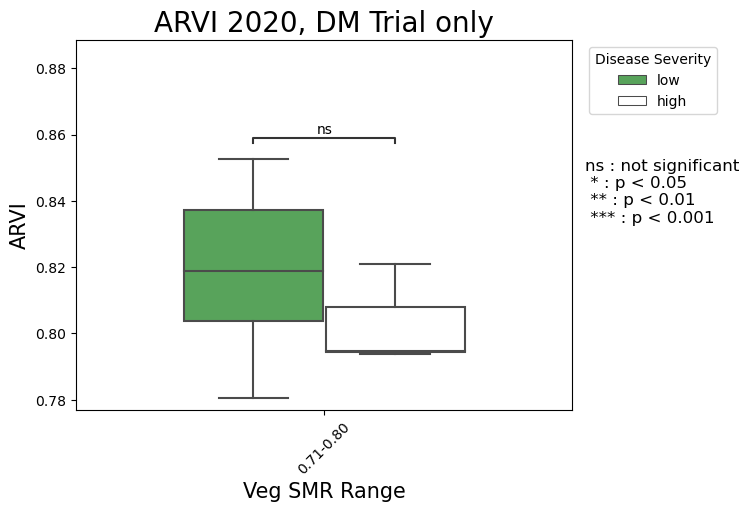

In [44]:
x = "smr_group"
y = "arvi"
hue = "severity_class"
hue_order=['low', 'high']
order = ['0.71-0.80']
pairs=[
    ((order[0], "high"), (order[0], "low"))
    ]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=dm_only, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.71-0.80'], 
                   rotation=45)
add_stat_annotation(ax, data=dm_only, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Veg SMR Range", fontsize=15)
plt.ylabel("ARVI", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("ARVI 2020, DM Trial only", fontsize=20)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.71-0.80_low v.s. 0.71-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.272e-01 U_stat=7.300e+01


Text(0.5, 1.0, 'SAVI 2020, DM Trial only')

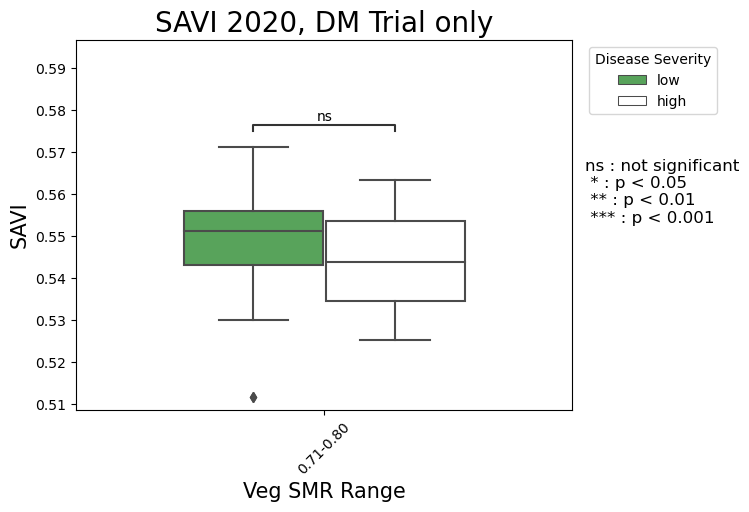

In [46]:
x = "smr_group"
y = "savi"
hue = "severity_class"
hue_order=['low', 'high']
order = ['0.71-0.80']
pairs=[
    ((order[0], "high"), (order[0], "low"))
    ]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=dm_only, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.71-0.80'], 
                   rotation=45)
add_stat_annotation(ax, data=dm_only, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Veg SMR Range", fontsize=15)
plt.ylabel("SAVI", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("SAVI 2020, DM Trial only", fontsize=20)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.71-0.80_low v.s. 0.71-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.955e-01 U_stat=6.500e+01


Text(0.5, 1.0, 'MSAVI 2020, DM Trial only')

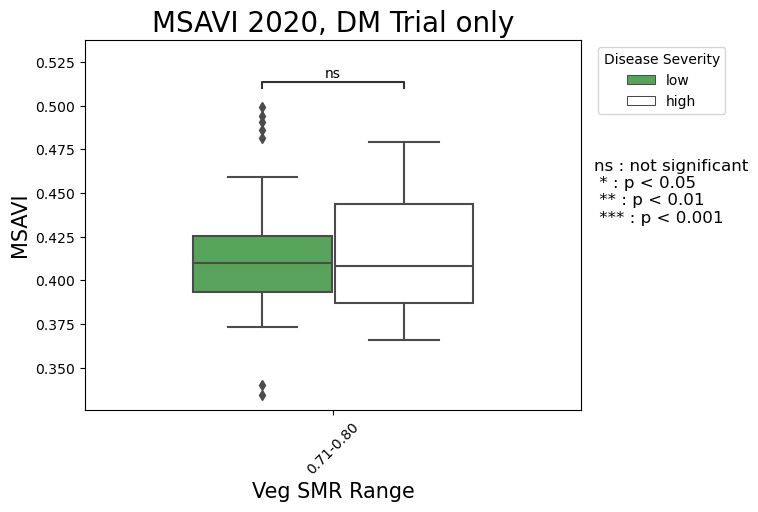

In [49]:
x = "smr_group"
y = "msavi"
hue = "severity_class"
hue_order=['low', 'high']
order = ['0.71-0.80']
pairs=[
    ((order[0], "high"), (order[0], "low"))
    ]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=dm_only, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.71-0.80'], 
                   rotation=45)
add_stat_annotation(ax, data=dm_only, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Veg SMR Range", fontsize=15)
plt.ylabel("MSAVI", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("MSAVI 2020, DM Trial only", fontsize=20)


# Try with incidence grouping

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.71-0.80_low v.s. 0.71-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.439e-01 U_stat=1.098e+03
0.61-0.70_low v.s. 0.61-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.175e-06 U_stat=8.000e+00
0.81-0.92_low v.s. 0.81-0.92_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=9.190e+02


Text(0.5, 1.0, 'EVI 2020, All Rows')

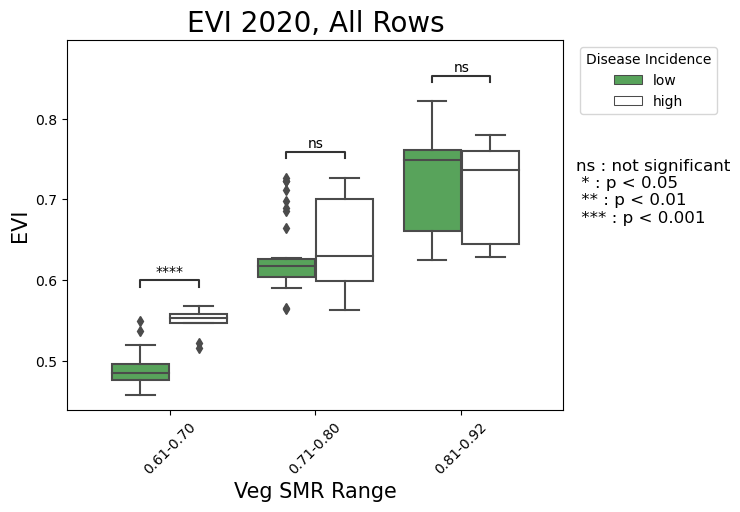

In [56]:
x = "smr_group"
y = "evi"
hue = "inc_class"
hue_order=['low', 'high']
order = ['0.61-0.70', '0.71-0.80', '0.81-0.92']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low"))]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_20, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.61-0.70', '0.71-0.80', '0.81-0.92'], 
                   rotation=45)
add_stat_annotation(ax, data=data_20, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Veg SMR Range", fontsize=15)
plt.ylabel("EVI", fontsize= 15)
plt.legend(title='Disease Incidence',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("EVI 2020, All Rows", fontsize=20)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.71-0.80_low v.s. 0.71-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.240e-02 U_stat=1.591e+03
0.61-0.70_low v.s. 0.61-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.725e-06 U_stat=5.000e+00
0.81-0.92_low v.s. 0.81-0.92_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.711e-01 U_stat=1.026e+03


Text(0.5, 1.0, 'ARVI 2020, All Rows')

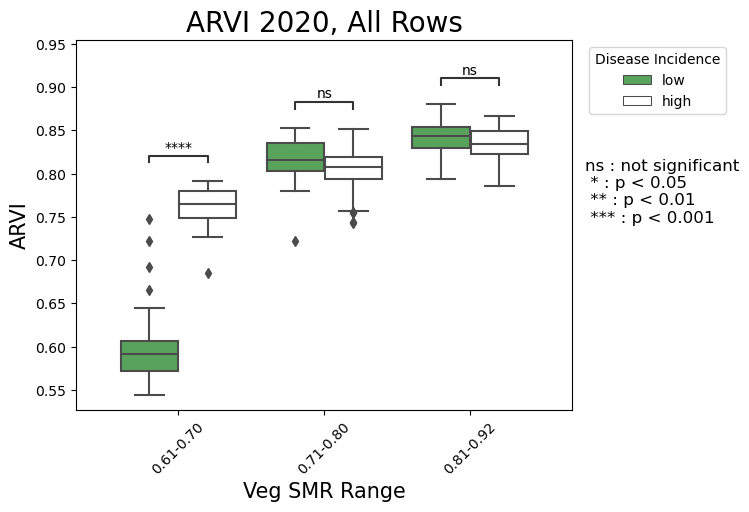

In [57]:
x = "smr_group"
y = "arvi"
hue = "inc_class"
hue_order=['low', 'high']
order = ['0.61-0.70', '0.71-0.80', '0.81-0.92']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low"))]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_20, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.61-0.70', '0.71-0.80', '0.81-0.92'], 
                   rotation=45)
add_stat_annotation(ax, data=data_20, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Veg SMR Range", fontsize=15)
plt.ylabel("ARVI", fontsize= 15)
plt.legend(title='Disease Incidence',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("ARVI 2020, All Rows", fontsize=20)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.71-0.80_low v.s. 0.71-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.349e+03
0.61-0.70_low v.s. 0.61-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.786e-06 U_stat=2.500e+01
0.81-0.92_low v.s. 0.81-0.92_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=8.660e+02


Text(0.5, 1.0, 'SAVI 2020, All Rows')

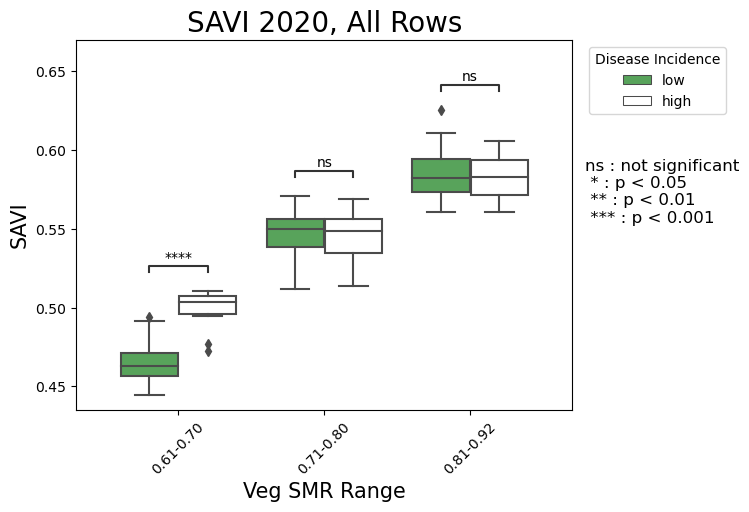

In [58]:
x = "smr_group"
y = "savi"
hue = "inc_class"
hue_order=['low', 'high']
order = ['0.61-0.70', '0.71-0.80', '0.81-0.92']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low"))]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_20, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.61-0.70', '0.71-0.80', '0.81-0.92'], 
                   rotation=45)
add_stat_annotation(ax, data=data_20, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Veg SMR Range", fontsize=15)
plt.ylabel("SAVI", fontsize= 15)
plt.legend(title='Disease Incidence',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("SAVI 2020, All Rows", fontsize=20)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.71-0.80_low v.s. 0.71-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.000e-01 U_stat=1.093e+03
0.61-0.70_low v.s. 0.61-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.732e-02 U_stat=1.650e+02
0.81-0.92_low v.s. 0.81-0.92_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=8.420e+02


Text(0.5, 1.0, 'MSAVI 2020, All Rows')

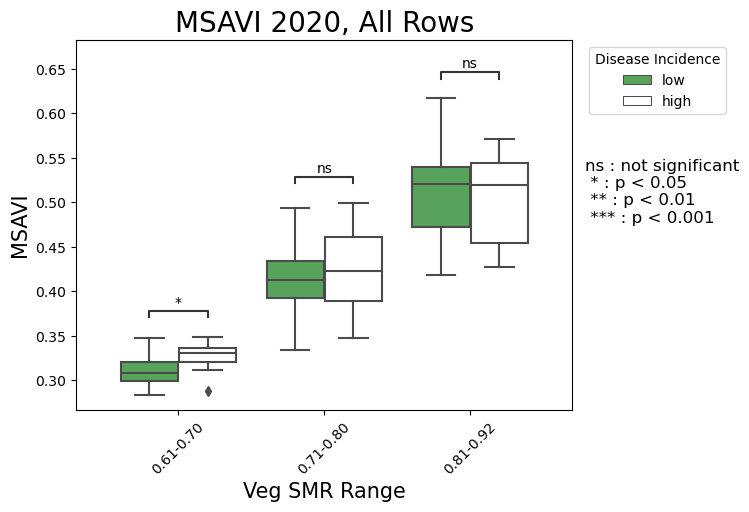

In [59]:
x = "smr_group"
y = "msavi"
hue = "inc_class"
hue_order=['low', 'high']
order = ['0.61-0.70', '0.71-0.80', '0.81-0.92']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low"))]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_20, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.61-0.70', '0.71-0.80', '0.81-0.92'], 
                   rotation=45)
add_stat_annotation(ax, data=data_20, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Veg SMR Range", fontsize=15)
plt.ylabel("MSAVI", fontsize= 15)
plt.legend(title='Disease Incidence',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("MSAVI 2020, All Rows", fontsize=20)


# Switch gears to 2021

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.51-0.60_low v.s. 0.51-0.60_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.217e-01 U_stat=1.609e+04
<= 0.50_low v.s. <= 0.50_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.506e+03
0.61-0.70_low v.s. 0.61-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.984e-01 U_stat=6.966e+03


Text(0.5, 1.0, 'EVI 2021, All Rows')

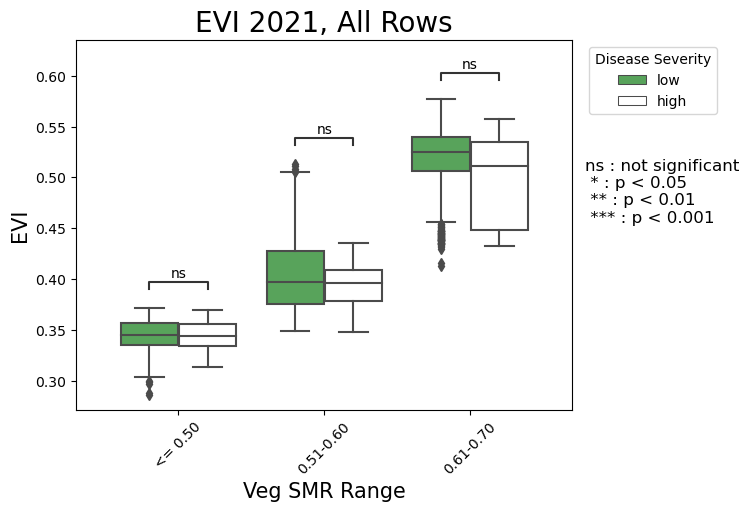

In [65]:
x = "smr_group"
y = "evi"
hue = "severity_class"
hue_order=['low', 'high']
order = ['<= 0.50', '0.51-0.60','0.61-0.70']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low"))]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['<= 0.50', '0.51-0.60','0.61-0.70'], 
                   rotation=45)
add_stat_annotation(ax, data=data_21, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Veg SMR Range", fontsize=15)
plt.ylabel("EVI", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("EVI 2021, All Rows", fontsize=20)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.51-0.60_low v.s. 0.51-0.60_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.396e-05 U_stat=1.941e+04
<= 0.50_low v.s. <= 0.50_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.427e-01 U_stat=2.975e+03
0.61-0.70_low v.s. 0.61-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.640e-04 U_stat=8.441e+03


Text(0.5, 1.0, 'ARVI 2021, All Rows')

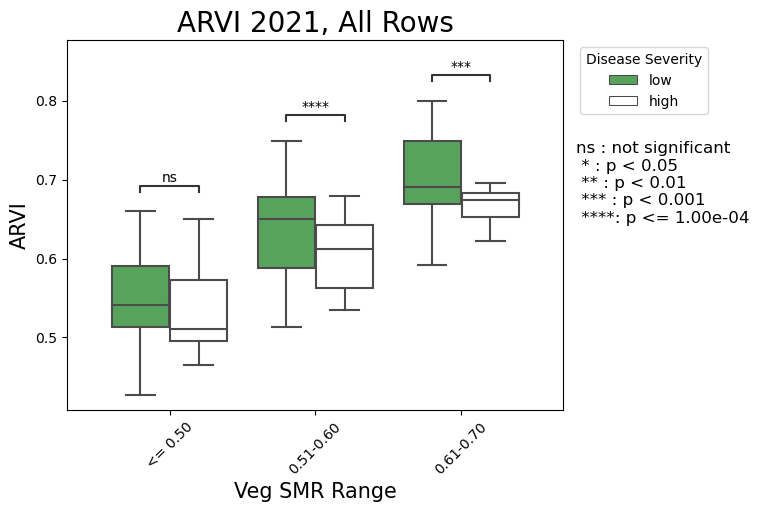

In [64]:
x = "smr_group"
y = "arvi"
hue = "severity_class"
hue_order=['low', 'high']
order = ['<= 0.50', '0.51-0.60','0.61-0.70']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low"))]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['<= 0.50', '0.51-0.60','0.61-0.70'], 
                   rotation=45)
add_stat_annotation(ax, data=data_21, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Veg SMR Range", fontsize=15)
plt.ylabel("ARVI", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', fontsize=12)
plt.title("ARVI 2021, All Rows", fontsize=20)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.51-0.60_low v.s. 0.51-0.60_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.003e-01 U_stat=1.597e+04
<= 0.50_low v.s. <= 0.50_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.611e+03
0.61-0.70_low v.s. 0.61-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.401e-01 U_stat=6.760e+03


Text(0.5, 1.0, 'SAVI 2021, All Rows')

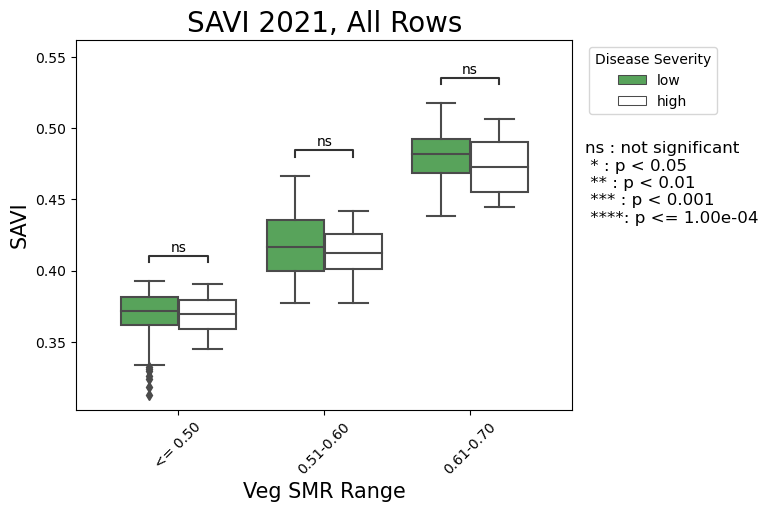

In [66]:
x = "smr_group"
y = "savi"
hue = "severity_class"
hue_order=['low', 'high']
order = ['<= 0.50', '0.51-0.60','0.61-0.70']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low"))]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['<= 0.50', '0.51-0.60','0.61-0.70'], 
                   rotation=45)
add_stat_annotation(ax, data=data_21, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Veg SMR Range", fontsize=15)
plt.ylabel("SAVI", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', fontsize=12)
plt.title("SAVI 2021, All Rows", fontsize=20)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.51-0.60_low v.s. 0.51-0.60_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.479e+04
<= 0.50_low v.s. <= 0.50_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.253e+03
0.61-0.70_low v.s. 0.61-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=5.980e+03


Text(0.5, 1.0, 'MSAVI 2021, All Rows')

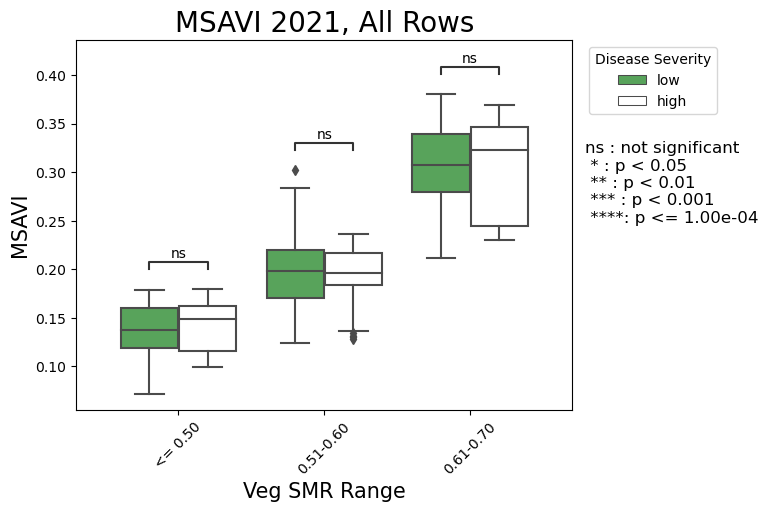

In [67]:
x = "smr_group"
y = "msavi"
hue = "severity_class"
hue_order=['low', 'high']
order = ['<= 0.50', '0.51-0.60','0.61-0.70']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low"))]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['<= 0.50', '0.51-0.60','0.61-0.70'], 
                   rotation=45)
add_stat_annotation(ax, data=data_21, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Veg SMR Range", fontsize=15)
plt.ylabel("MSAVI", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', fontsize=12)
plt.title("MSAVI 2021, All Rows", fontsize=20)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.51-0.60_low v.s. 0.51-0.60_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.396e-01 U_stat=1.606e+04
<= 0.50_low v.s. <= 0.50_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.465e-01 U_stat=2.727e+03
0.61-0.70_low v.s. 0.61-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.296e-05 U_stat=8.865e+03


Text(0.5, 1.0, 'GRI 2021, All Rows')

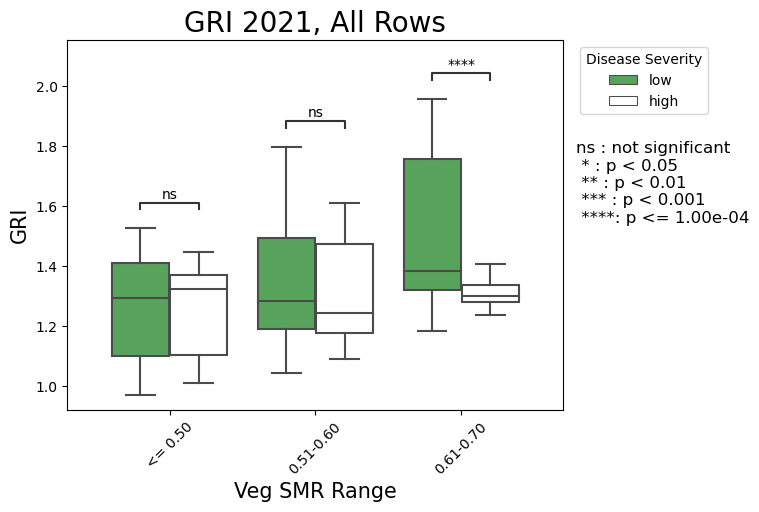

In [68]:
x = "smr_group"
y = "gri"
hue = "severity_class"
hue_order=['low', 'high']
order = ['<= 0.50', '0.51-0.60','0.61-0.70']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low"))]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['<= 0.50', '0.51-0.60','0.61-0.70'], 
                   rotation=45)
add_stat_annotation(ax, data=data_21, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Veg SMR Range", fontsize=15)
plt.ylabel("GRI", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', fontsize=12)
plt.title("GRI 2021, All Rows", fontsize=20)


In [69]:
dm_21 = data_21.loc[data_21['Block']=='DM']
dm_21.Block.unique()

array(['DM'], dtype=object)

# Repeat with DM Trial only

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.51-0.60_low v.s. 0.51-0.60_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.559e-03 U_stat=5.280e+03
<= 0.50_low v.s. <= 0.50_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.910e+02
0.61-0.70_low v.s. 0.61-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.666e+03


Text(0.5, 1.0, 'EVI 2021, DM Trial')

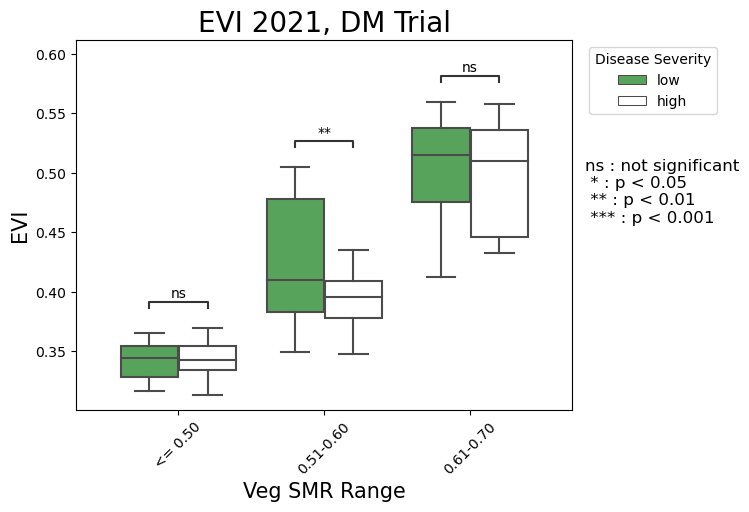

In [71]:
x = "smr_group"
y = "evi"
hue = "severity_class"
hue_order=['low', 'high']
order = ['<= 0.50', '0.51-0.60','0.61-0.70']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low"))]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=dm_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['<= 0.50', '0.51-0.60','0.61-0.70'], 
                   rotation=45)
add_stat_annotation(ax, data=dm_21, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Veg SMR Range", fontsize=15)
plt.ylabel("EVI", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("EVI 2021, DM Trial", fontsize=20)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.51-0.60_low v.s. 0.51-0.60_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.362e-07 U_stat=5.910e+03
<= 0.50_low v.s. <= 0.50_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.569e-01 U_stat=3.810e+02
0.61-0.70_low v.s. 0.61-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.038e-02 U_stat=1.996e+03


Text(0.5, 1.0, 'ARVI 2021, DM Trial')

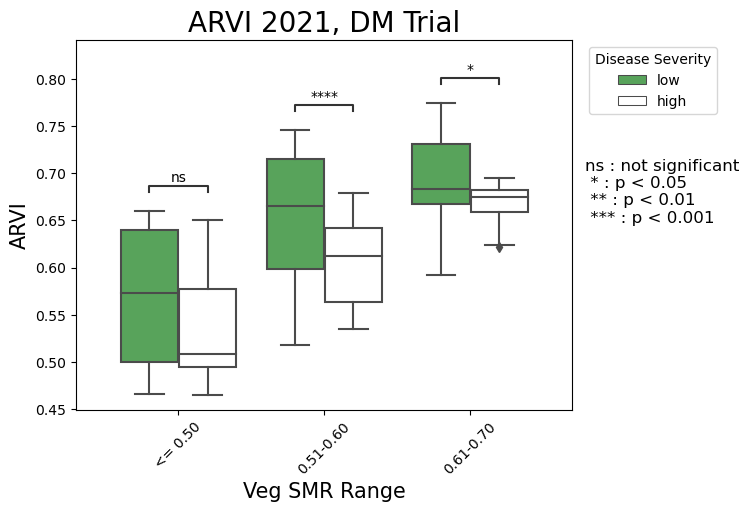

In [75]:
x = "smr_group"
y = "arvi"
hue = "severity_class"
hue_order=['low', 'high']
order = ['<= 0.50', '0.51-0.60','0.61-0.70']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low"))]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=dm_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['<= 0.50', '0.51-0.60','0.61-0.70'], 
                   rotation=45)
add_stat_annotation(ax, data=dm_21, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Veg SMR Range", fontsize=15)
plt.ylabel("ARVI", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("ARVI 2021, DM Trial", fontsize=20)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.51-0.60_low v.s. 0.51-0.60_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.977e-03 U_stat=5.216e+03
<= 0.50_low v.s. <= 0.50_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.000e+02
0.61-0.70_low v.s. 0.61-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.622e+03


Text(0.5, 1.0, 'SAVI 2021, DM Trial')

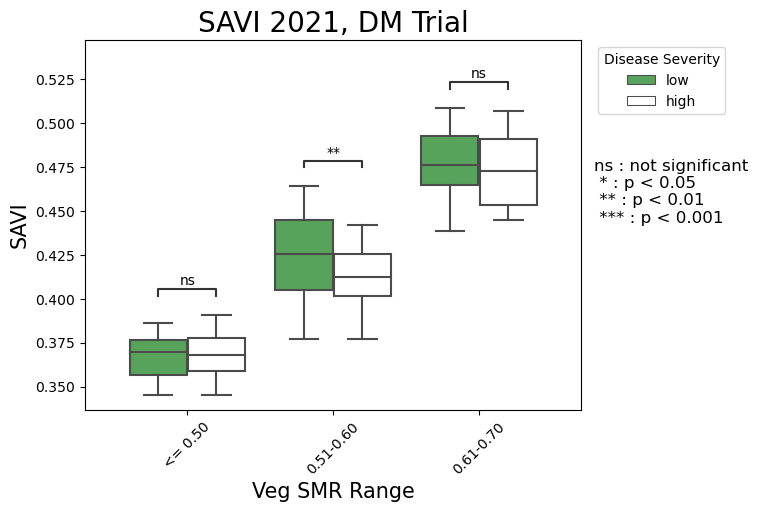

In [74]:
x = "smr_group"
y = "savi"
hue = "severity_class"
hue_order=['low', 'high']
order = ['<= 0.50', '0.51-0.60','0.61-0.70']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low"))]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=dm_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['<= 0.50', '0.51-0.60','0.61-0.70'], 
                   rotation=45)
add_stat_annotation(ax, data=dm_21, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Veg SMR Range", fontsize=15)
plt.ylabel("SAVI", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("SAVI 2021, DM Trial", fontsize=20)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.51-0.60_low v.s. 0.51-0.60_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.294e-03 U_stat=5.138e+03
<= 0.50_low v.s. <= 0.50_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.580e+02
0.61-0.70_low v.s. 0.61-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.585e+03


Text(0.5, 1.0, 'MSAVI 2021, DM Trial')

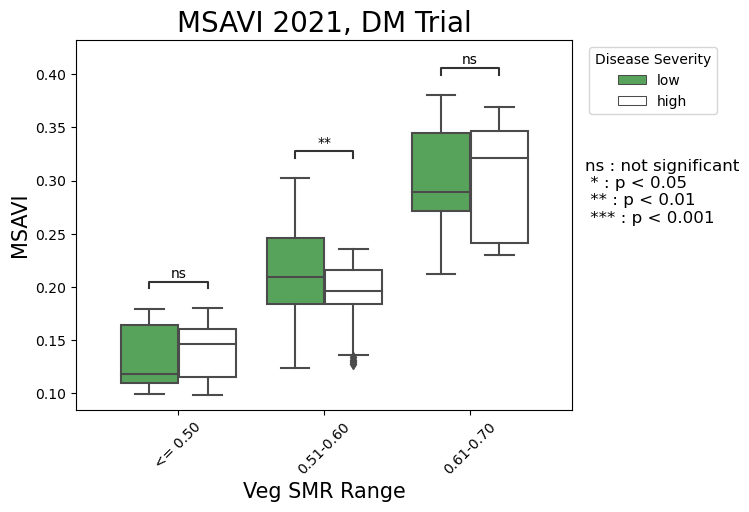

In [76]:
x = "smr_group"
y = "msavi"
hue = "severity_class"
hue_order=['low', 'high']
order = ['<= 0.50', '0.51-0.60','0.61-0.70']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low"))]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=dm_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['<= 0.50', '0.51-0.60','0.61-0.70'], 
                   rotation=45)
add_stat_annotation(ax, data=dm_21, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Veg SMR Range", fontsize=15)
plt.ylabel("MSAVI", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("MSAVI 2021, DM Trial", fontsize=20)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.51-0.60_low v.s. 0.51-0.60_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.881e-04 U_stat=5.357e+03
<= 0.50_low v.s. <= 0.50_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.500e+02
0.61-0.70_low v.s. 0.61-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.802e-03 U_stat=2.159e+03


Text(0.5, 1.0, 'GRI 2021, DM Trial')

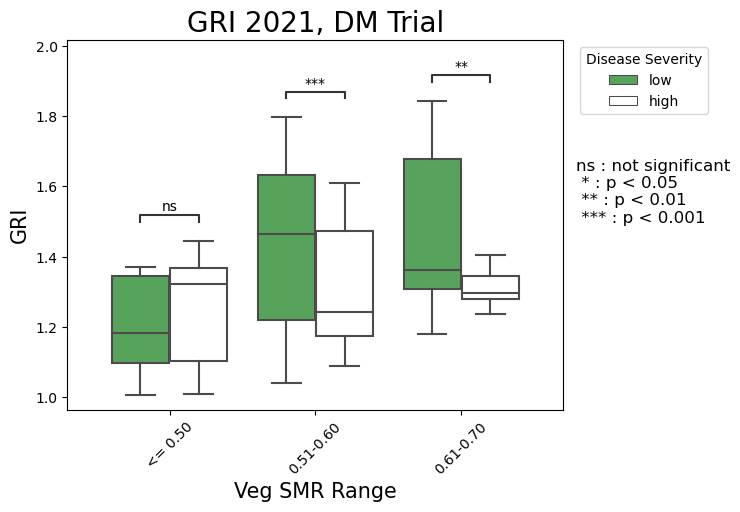

In [77]:
x = "smr_group"
y = "gri"
hue = "severity_class"
hue_order=['low', 'high']
order = ['<= 0.50', '0.51-0.60','0.61-0.70']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low"))]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=dm_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['<= 0.50', '0.51-0.60','0.61-0.70'], 
                   rotation=45)
add_stat_annotation(ax, data=dm_21, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Veg SMR Range", fontsize=15)
plt.ylabel("GRI", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("GRI 2021, DM Trial", fontsize=20)


# Repeat with incidence, 2021

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.51-0.60_low v.s. 0.51-0.60_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.721e-35 U_stat=5.507e+04
<= 0.50_low v.s. <= 0.50_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.325e-10 U_stat=6.405e+03
0.61-0.70_low v.s. 0.61-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.234e-04 U_stat=1.618e+04


Text(0.5, 1.0, 'EVI 2021, All Rows')

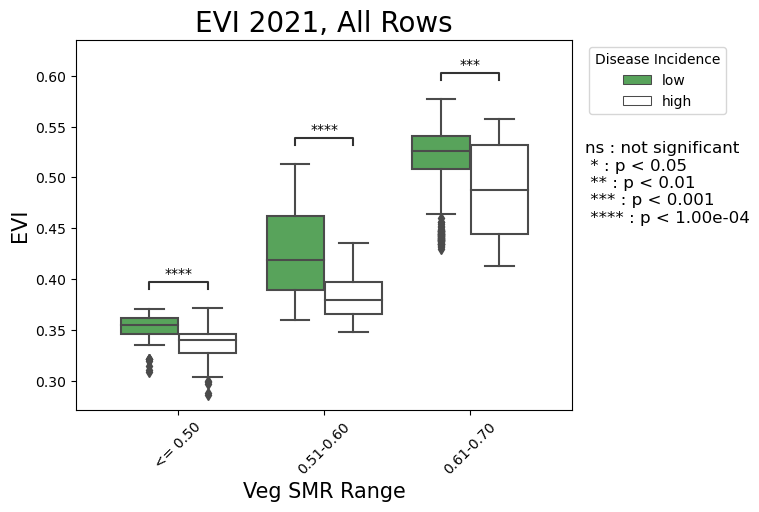

In [82]:
x = "smr_group"
y = "evi"
hue = "inc_class"
hue_order=['low', 'high']
order = ['<= 0.50', '0.51-0.60','0.61-0.70']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low"))]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['<= 0.50', '0.51-0.60','0.61-0.70'], 
                   rotation=45)
add_stat_annotation(ax, data=data_21, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Veg SMR Range", fontsize=15)
plt.ylabel("EVI", fontsize= 15)
plt.legend(title='Disease Incidence',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n **** : p < 1.00e-04', fontsize=12)
plt.title("EVI 2021, All Rows", fontsize=20)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.51-0.60_low v.s. 0.51-0.60_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.835e-01 U_stat=3.592e+04
<= 0.50_low v.s. <= 0.50_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.011e-11 U_stat=1.638e+03
0.61-0.70_low v.s. 0.61-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.922e-07 U_stat=1.757e+04


Text(0.5, 1.0, 'ARVI 2021, All Rows')

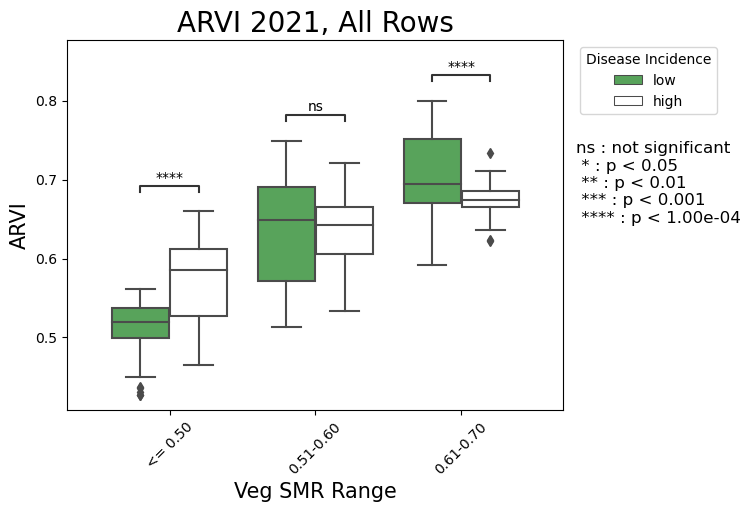

In [83]:
x = "smr_group"
y = "arvi"
hue = "inc_class"
hue_order=['low', 'high']
order = ['<= 0.50', '0.51-0.60','0.61-0.70']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low"))]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['<= 0.50', '0.51-0.60','0.61-0.70'], 
                   rotation=45)
add_stat_annotation(ax, data=data_21, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Veg SMR Range", fontsize=15)
plt.ylabel("ARVI", fontsize= 15)
plt.legend(title='Disease Incidence',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n **** : p < 1.00e-04', fontsize=12)
plt.title("ARVI 2021, All Rows", fontsize=20)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.51-0.60_low v.s. 0.51-0.60_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.530e-29 U_stat=5.296e+04
<= 0.50_low v.s. <= 0.50_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.674e-09 U_stat=6.272e+03
0.61-0.70_low v.s. 0.61-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.600e-02 U_stat=1.528e+04


Text(0.5, 1.0, 'SAVI 2021, All Rows')

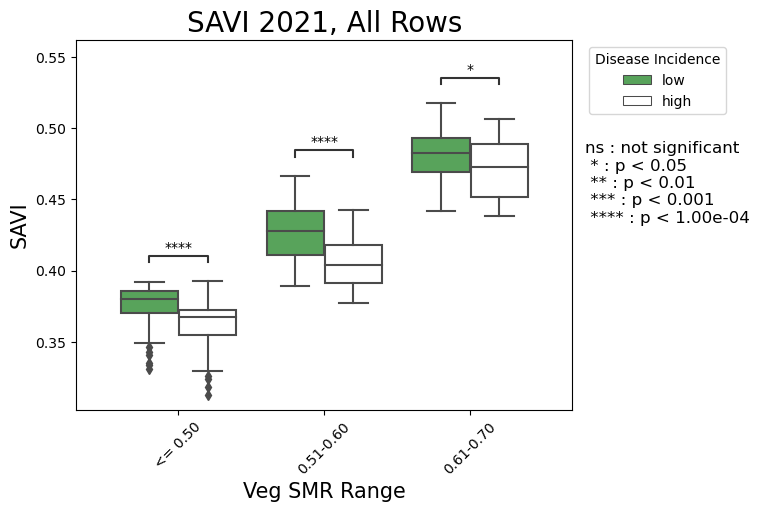

In [84]:
x = "smr_group"
y = "savi"
hue = "inc_class"
hue_order=['low', 'high']
order = ['<= 0.50', '0.51-0.60','0.61-0.70']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low"))]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['<= 0.50', '0.51-0.60','0.61-0.70'], 
                   rotation=45)
add_stat_annotation(ax, data=data_21, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Veg SMR Range", fontsize=15)
plt.ylabel("SAVI", fontsize= 15)
plt.legend(title='Disease Incidence',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n **** : p < 1.00e-04', fontsize=12)
plt.title("SAVI 2021, All Rows", fontsize=20)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.51-0.60_low v.s. 0.51-0.60_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.890e-40 U_stat=5.668e+04
<= 0.50_low v.s. <= 0.50_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.474e-15 U_stat=6.930e+03
0.61-0.70_low v.s. 0.61-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.016e-01 U_stat=1.415e+04


Text(0.5, 1.0, 'MSAVI 2021, All Rows')

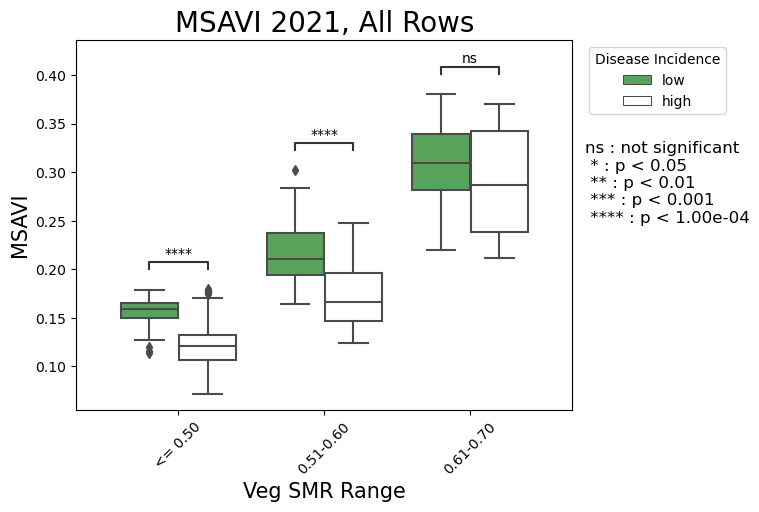

In [85]:
x = "smr_group"
y = "msavi"
hue = "inc_class"
hue_order=['low', 'high']
order = ['<= 0.50', '0.51-0.60','0.61-0.70']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low"))]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['<= 0.50', '0.51-0.60','0.61-0.70'], 
                   rotation=45)
add_stat_annotation(ax, data=data_21, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Veg SMR Range", fontsize=15)
plt.ylabel("MSAVI", fontsize= 15)
plt.legend(title='Disease Incidence',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n **** : p < 1.00e-04', fontsize=12)
plt.title("MSAVI 2021, All Rows", fontsize=20)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.51-0.60_low v.s. 0.51-0.60_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.440e-23 U_stat=5.104e+04
<= 0.50_low v.s. <= 0.50_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.412e-23 U_stat=7.672e+03
0.61-0.70_low v.s. 0.61-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.453e-11 U_stat=1.914e+04


Text(0.5, 1.0, 'GRI 2021, All Rows')

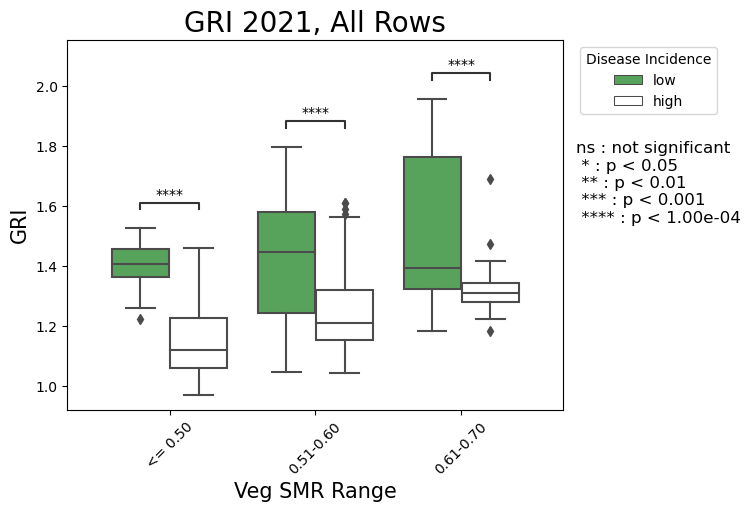

In [86]:
x = "smr_group"
y = "gri"
hue = "inc_class"
hue_order=['low', 'high']
order = ['<= 0.50', '0.51-0.60','0.61-0.70']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low"))]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['<= 0.50', '0.51-0.60','0.61-0.70'], 
                   rotation=45)
add_stat_annotation(ax, data=data_21, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Veg SMR Range", fontsize=15)
plt.ylabel("GRI", fontsize= 15)
plt.legend(title='Disease Incidence',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n **** : p < 1.00e-04', fontsize=12)
plt.title("GRI 2021, All Rows", fontsize=20)


# Incidence, DM trial only

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.51-0.60_low v.s. 0.51-0.60_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.653e-21 U_stat=7.758e+03
<= 0.50_low v.s. <= 0.50_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.971e-02 U_stat=1.570e+02
0.61-0.70_low v.s. 0.61-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.810e-03 U_stat=3.263e+03


Text(0.5, 1.0, 'EVI 2021, DM Trial')

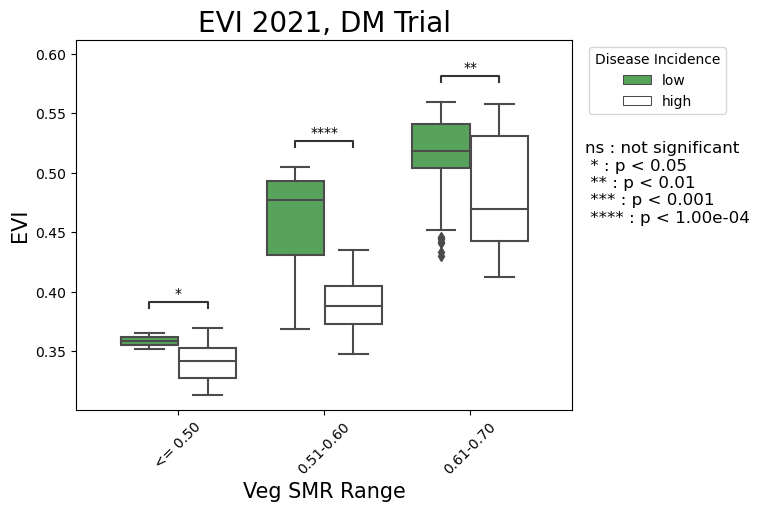

In [87]:
x = "smr_group"
y = "evi"
hue = "inc_class"
hue_order=['low', 'high']
order = ['<= 0.50', '0.51-0.60','0.61-0.70']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low"))]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=dm_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['<= 0.50', '0.51-0.60','0.61-0.70'], 
                   rotation=45)
add_stat_annotation(ax, data=dm_21, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Veg SMR Range", fontsize=15)
plt.ylabel("EVI", fontsize= 15)
plt.legend(title='Disease Incidence',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n **** : p < 1.00e-04', fontsize=12)
plt.title("EVI 2021, DM Trial", fontsize=20)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.51-0.60_low v.s. 0.51-0.60_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.133e-10 U_stat=6.593e+03
<= 0.50_low v.s. <= 0.50_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.486e-01 U_stat=4.300e+01
0.61-0.70_low v.s. 0.61-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.371e-04 U_stat=3.320e+03


Text(0.5, 1.0, 'ARVI 2021, DM Trial')

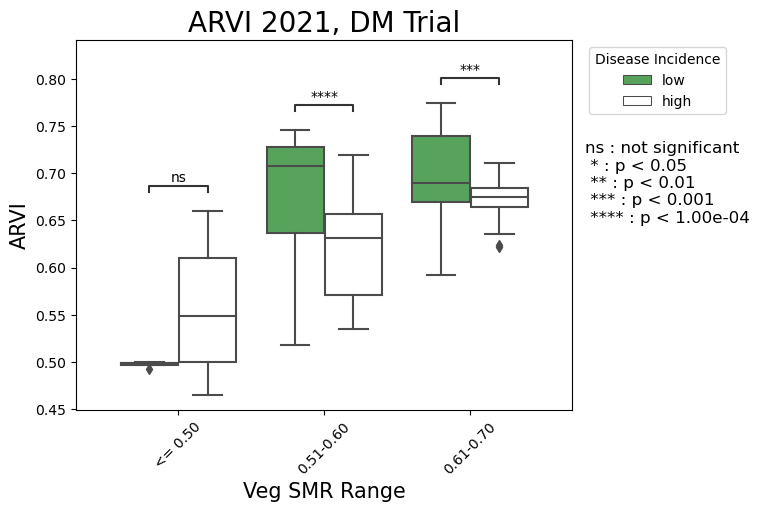

In [88]:
x = "smr_group"
y = "arvi"
hue = "inc_class"
hue_order=['low', 'high']
order = ['<= 0.50', '0.51-0.60','0.61-0.70']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low"))]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=dm_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['<= 0.50', '0.51-0.60','0.61-0.70'], 
                   rotation=45)
add_stat_annotation(ax, data=dm_21, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Veg SMR Range", fontsize=15)
plt.ylabel("ARVI", fontsize= 15)
plt.legend(title='Disease Incidence',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n **** : p < 1.00e-04', fontsize=12)
plt.title("ARVI 2021, DM Trial", fontsize=20)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.51-0.60_low v.s. 0.51-0.60_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.449e-17 U_stat=7.379e+03
<= 0.50_low v.s. <= 0.50_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.323e-02 U_stat=1.550e+02
0.61-0.70_low v.s. 0.61-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.634e-02 U_stat=3.041e+03


Text(0.5, 1.0, 'SAVI 2021, DM Trial')

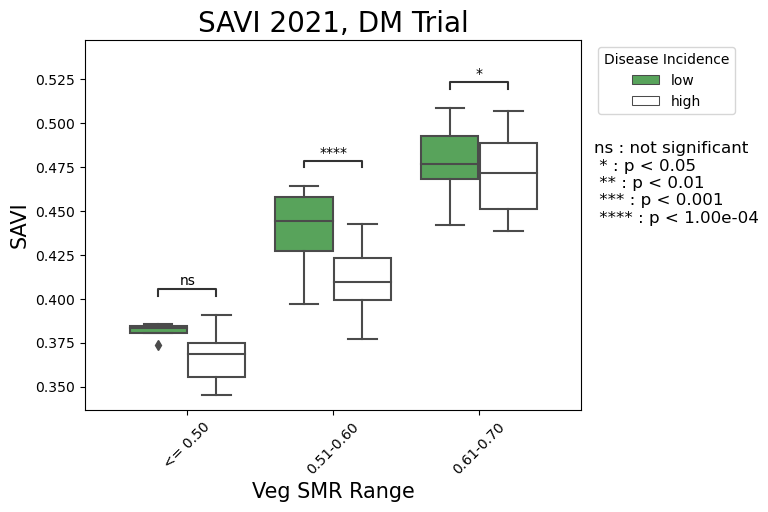

In [89]:
x = "smr_group"
y = "savi"
hue = "inc_class"
hue_order=['low', 'high']
order = ['<= 0.50', '0.51-0.60','0.61-0.70']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low"))]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=dm_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['<= 0.50', '0.51-0.60','0.61-0.70'], 
                   rotation=45)
add_stat_annotation(ax, data=dm_21, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Veg SMR Range", fontsize=15)
plt.ylabel("SAVI", fontsize= 15)
plt.legend(title='Disease Incidence',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n **** : p < 1.00e-04', fontsize=12)
plt.title("SAVI 2021, DM Trial", fontsize=20)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.51-0.60_low v.s. 0.51-0.60_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.433e-20 U_stat=7.688e+03
<= 0.50_low v.s. <= 0.50_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.926e-02 U_stat=1.610e+02
0.61-0.70_low v.s. 0.61-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.228e-02 U_stat=3.028e+03


Text(0.5, 1.0, 'MSAVI 2021, DM Trial')

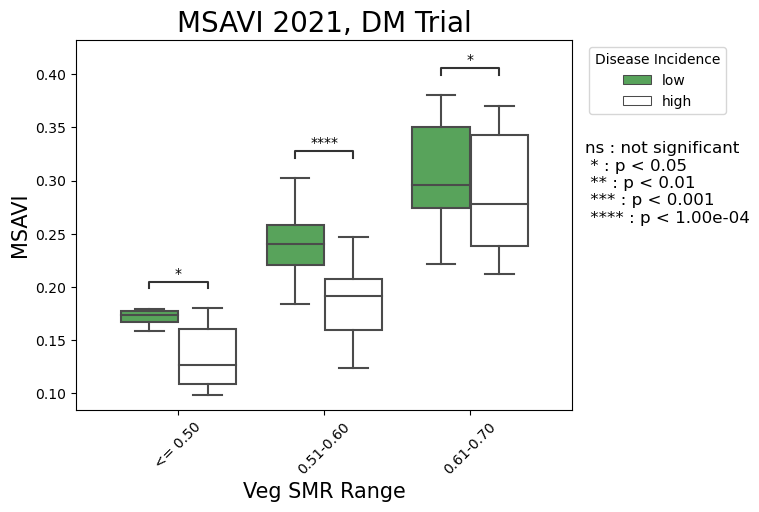

In [90]:
x = "smr_group"
y = "msavi"
hue = "inc_class"
hue_order=['low', 'high']
order = ['<= 0.50', '0.51-0.60','0.61-0.70']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low"))]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=dm_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['<= 0.50', '0.51-0.60','0.61-0.70'], 
                   rotation=45)
add_stat_annotation(ax, data=dm_21, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Veg SMR Range", fontsize=15)
plt.ylabel("MSAVI", fontsize= 15)
plt.legend(title='Disease Incidence',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n **** : p < 1.00e-04', fontsize=12)
plt.title("MSAVI 2021, DM Trial", fontsize=20)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.51-0.60_low v.s. 0.51-0.60_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.255e-14 U_stat=7.144e+03
<= 0.50_low v.s. <= 0.50_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.832e-02 U_stat=1.510e+02
0.61-0.70_low v.s. 0.61-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.343e-01 U_stat=2.861e+03


Text(0.5, 1.0, 'MSAVI Exp 2021, DM Trial')

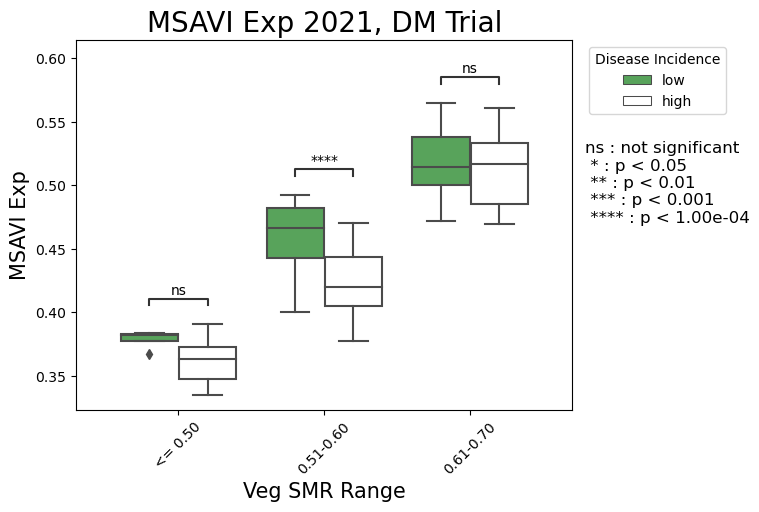

In [91]:
x = "smr_group"
y = "msavi_exp"
hue = "inc_class"
hue_order=['low', 'high']
order = ['<= 0.50', '0.51-0.60','0.61-0.70']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low"))]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=dm_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['<= 0.50', '0.51-0.60','0.61-0.70'], 
                   rotation=45)
add_stat_annotation(ax, data=dm_21, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Veg SMR Range", fontsize=15)
plt.ylabel("MSAVI Exp", fontsize= 15)
plt.legend(title='Disease Incidence',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n **** : p < 1.00e-04', fontsize=12)
plt.title("MSAVI Exp 2021, DM Trial", fontsize=20)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.51-0.60_low v.s. 0.51-0.60_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.004e-18 U_stat=7.473e+03
<= 0.50_low v.s. <= 0.50_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.099e-01 U_stat=1.430e+02
0.61-0.70_low v.s. 0.61-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.558e-09 U_stat=3.902e+03


Text(0.5, 1.0, 'GRI 2021, DM Trial')

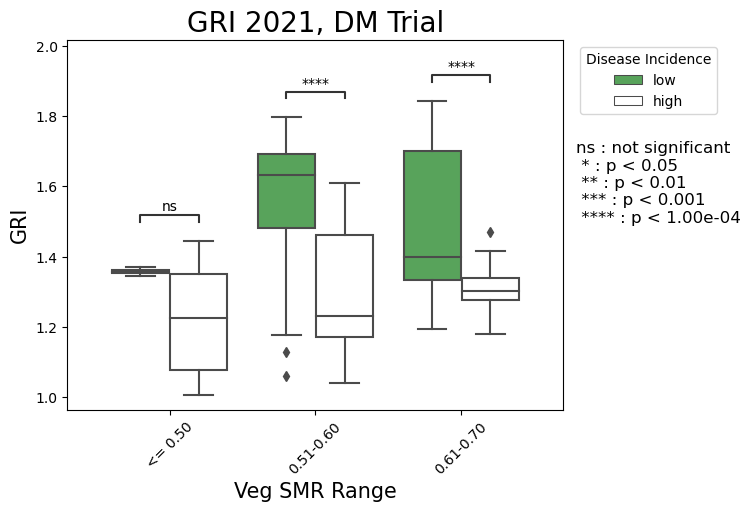

In [92]:
x = "smr_group"
y = "gri"
hue = "inc_class"
hue_order=['low', 'high']
order = ['<= 0.50', '0.51-0.60','0.61-0.70']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low"))]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=dm_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['<= 0.50', '0.51-0.60','0.61-0.70'], 
                   rotation=45)
add_stat_annotation(ax, data=dm_21, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Veg SMR Range", fontsize=15)
plt.ylabel("GRI", fontsize= 15)
plt.legend(title='Disease Incidence',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n **** : p < 1.00e-04', fontsize=12)
plt.title("GRI 2021, DM Trial", fontsize=20)


# Last one - try with 2022, severity + SMR

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.61-0.70_low v.s. 0.61-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.289e-01 U_stat=1.060e+02


Text(0.5, 1.0, 'EVI 2022, All Rows')

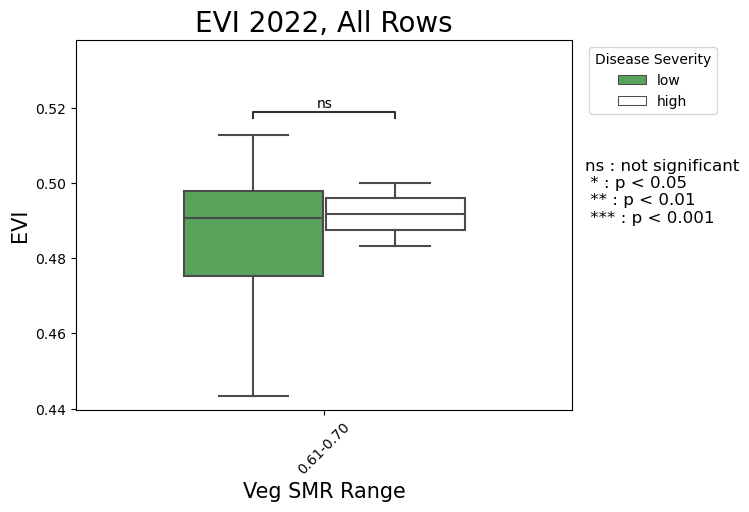

In [94]:
x = "smr_group"
y = "evi"
hue = "severity_class"
hue_order=['low', 'high']
order = ['0.61-0.70']
pairs=[
    ((order[0], "high"), (order[0], "low"))]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_22, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.61-0.70'], 
                   rotation=45)
add_stat_annotation(ax, data=data_22, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Veg SMR Range", fontsize=15)
plt.ylabel("EVI", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("EVI 2022, All Rows", fontsize=20)
